# CNN(Convolutional Neural Neetwork)

cnn.png

## 1D CNN

- in_channels : input 의 feature 차원수
- out_channels: output 의 feature 차원수
- kernel_size : 입력길이를 얼마만큼 볼것인가
- stride: kernel 을 얼마만큼씩 이동할 것인가
- padding: 양방향으로 얼마만큼 패딩할 것인가

입력 텐서 shape
  >  batch , feature dim , time step(입력 길이)

1dcnn.gif


## pooling layer
합성곱 layer의 출력 크기를 줄이거나 특정 출력 부분을 강조하기 위해 사용

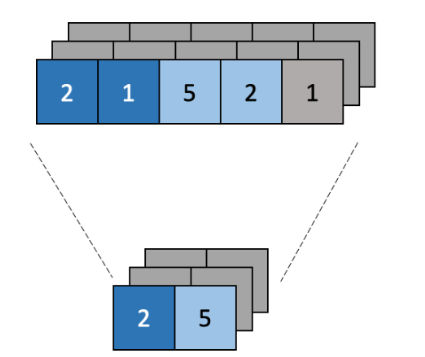

## Global Pooling layer
- pooling layer보다 급격하게 차원을 감소 시킨다.
- linear layer 넣기 위해 차원을 변경하는 목적으로 쓴다.

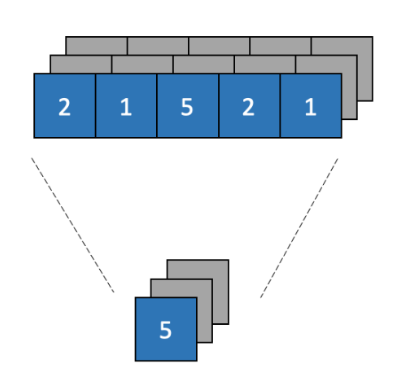

# [Load Data](https://github.com/e9t/nsmc)

In [1]:
import numpy as np
import pandas as pd

import torch
from torchtext.vocab import build_vocab_from_iterator

from tqdm.auto import tqdm

In [2]:
# 구글 드라이브 연결(데이터 로드를 위해서)
# try:
  # from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/"
# except:
#     DATA_PATH = "./data/"

Mounted at /content/drive


In [31]:
df_ko = pd.read_csv(DATA_PATH+"ratings_train.txt", sep="\t")
df_ko = df_ko[:1000]
print(f'{df_ko.isnull().sum().sum()} / {df_ko.shape}')
df_ko.head()

0 / (1000, 3)


id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

In [4]:
df_ko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1 non-null      int64 
 1   document  1 non-null      object
 2   label     1 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 152.0+ bytes


In [5]:
df_ko['document'][0]='이 영화는 100점 10000점에 만점을 주고싶지만 87점을 주고싶네요.'

In [6]:
df_ko

id                                  document  label
0  9976970  이 영화는 100점 10000점에 만점을 주고싶지만 87점을 주고싶네요.      0

In [7]:
# isnull()로 조회하고 true된값이 나오는데 sum을하여 같을 확인

print(df_ko.isnull().sum()) # 이렇게 하면 컬럼별 결측치의 값을 확인
print(df_ko.isnull().sum().sum()) # 컬럼별 결측치들의 합을 구함

id          0
document    0
label       0
dtype: int64
0


In [8]:
c=df_ko['document'].isnull() # document 에서 false값이 나옴

In [9]:
df_ko.loc[c]

Empty DataFrame
Columns: [id, document, label]
Index: []

In [10]:
df_ko = df_ko.dropna().reset_index(drop=True) # 결측치 제거
# dropna()는 결측치가 있는 행을 제거 해서 index가 비어진다. 그래서 index정리를 해줘야한다.
print(f'{df_ko.isnull().sum().sum()} / {df_ko.shape}')
df_ko.head()

0 / (1, 3)


id                                  document  label
0  9976970  이 영화는 100점 10000점에 만점을 주고싶지만 87점을 주고싶네요.      0

In [12]:

# 0.결측치 제거된 프레임 만들기
step_0 = df_ko.dropna()
# 1. 특정 결측치 인덱스 값을 이용한 조건 만들기
step_1=10
# 2.조건 적용
step_0.iloc[step_1]

IndexError: ignored

# Text Preprocessing

## Cleaning

In [32]:
df_ko['document'] = df_ko['document'].map(lambda x: x.strip()) # 문자열 공백 제거
# df_ko['document'] = df_ko.apply(lambda x: x['document'].strip()) # 문자열 공백 제거

#  map,apply를 적용하느거 원리랑 핵심 알아야함
# map은 하나의 컬럼일때만 씀
# apply를 쓸땐 matrxi 일때만 사용 axis = 도 있음
# 문장열 사이의 공백 제거는 replace를 이용해서 공백제거해야함
# 문자열.replace(' ','')
print(f'{df_ko.isnull().sum().sum()} / {df_ko.shape}')
df_ko.head()

0 / (1000, 3)


id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

In [33]:
df_ko['document'] = df_ko['document'].map(lambda x: x.replace("..", " "))

print(f'{df_ko.isnull().sum().sum()} / {df_ko.shape}')
df_ko.head()

0 / (1000, 3)


id                                           document  label
0   9976970                                 아 더빙  진짜 짜증나네요 목소리      0
1   3819312                     흠 .포스터보고 초딩영화줄  오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                        교도소 이야기구먼  솔직히 재미는 없다 평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

In [15]:
df_ko.tail()

id                                  document  label
0  9976970  이 영화는 100점 10000점에 만점을 주고싶지만 87점을 주고싶네요.      0

## Tokenization

In [16]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 29.9 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-07-28 06:06:19--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 3

In [17]:
from konlpy.tag import Mecab

mecab = Mecab()

In [ ]:
tokens = mecab.pos(df_ko["document"][0])
tokens

In [ ]:
df_ko["document"][0] #  원래 원본

In [34]:
from konlpy.tag import Okt
okt = Okt()
test_tokens = okt.pos(df_ko["document"][0])
len(test_tokens)

5

In [ ]:
test_tokens

In [ ]:
tokens

## Stemming / Stopword

In [35]:
def tokenizer(text):# 하나의 문장을 토큰화
    tokens = okt.pos(text) # 토큰화
    return [ token[0] for token in tokens if token[1][0] in "NVA"] # 추출

In [36]:
df_ko["document"][0]

'아 더빙  진짜 짜증나네요 목소리'

In [37]:
tokenizer(df_ko["document"][0])[:16]

['더빙', '진짜', '짜증나네요', '목소리']

In [38]:
def yield_tokens(data,tokenizer): #전체 dataset을 토큰화 해주는 거
# 파이선은 일급함수, 함수를 파라미터로 받을수있음
    for text in tqdm(data):
        yield tokenizer(text)

## 어휘집 생성
- `<pad>(패딩)`: 0
- `<unk>(정의되지 않은 문자)`: 1

In [39]:
gen = yield_tokens(df_ko["document"],tokenizer) # 토큰화

vocab = build_vocab_from_iterator(gen, specials=["<pad>","<unk>"]) # 어휘집
# padding 길이를 맞추기위해 의미 없는 숫자 0을 넣어줌

# unknown의 약자 unk 내가 가지고 있는 단어가 들어오면 pad 아니면 unk를 내보냄
# 학습되지 않은 문자가 들어오면 unk가 들어옴
# build_vocab_from_iterator 어려우니 다시 이해해야함,
vocab.set_default_index(vocab["<unk>"])
# 모르는 값이 들어와 있을 경우 unk을 적용해달라 default index값을 unk index값으로 설정하겠다는 의미
len(vocab)

  0%|          | 0/1000 [00:00<?, ?it/s]

4445

In [40]:
for i,j in vocab.item():
  print(i,j)

AttributeError: ignored

In [41]:
type(vocab)

torchtext.vocab.vocab.Vocab

In [42]:
vocab(['점', '100', '87', '목소리','10000'])

[6, 468, 1, 891, 1]

In [43]:
vocab(['짜증', '나', '네요', '목소리', 'ㅁㅁㅁ', 'ㅍㅍㅍ'])

[261, 53, 1, 891, 1, 1]

In [44]:
features = [ vocab(tokenizer(text)) for text in tqdm(df_ko["document"].tolist()) ]
len(features)

  0%|          | 0/1000 [00:00<?, ?it/s]

1000

- 디버깅

In [29]:
len(features)

1

In [45]:
vocab.lookup_tokens([143, 20, 197, 518, 1])

['재미없다', '감동', '요즘', '드럽게', '<unk>']

In [46]:
# 결과값이 숫자로 나오게 하는거를 리스트로 담게 하기
num_list= [] # 토큰화 된 데이터를 담을 변수 선언
# 데이터 프레임에서 for 문으로 돌린다.
for text in tqdm(df_ko['document']):
# for문안에 가져온걸 토큰화 tokenizer()함수를 이용해서 데이터를 토큰화 시켜준다
  token_text=tokenizer(text)
# vocab()함수를 이용해서 토큰화(글자)-> 토큰화(숫자) 변환
  vocab_text=vocab(token_text)
# 토큰화 시켜준 숫자 출력 값을 list로 넣어준다.
  num_list.append(vocab_text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [47]:
df_ko['document'][0] # 0번 row data

'아 더빙  진짜 짜증나네요 목소리'

In [48]:
tokenizer(df_ko['document'][0]) # 0번 row data 토큰화

['더빙', '진짜', '짜증나네요', '목소리']

In [49]:
vocab(tokenizer(df_ko['document'][0])) # 0번 row data 토큰화된것을 숫자로 출력

[294, 3, 3935, 891]

In [50]:

num_list[0]  # for문에서 돌린 0번째 토큰화된것을 숫자로 출력 위와 아래값이 같은지 확인

[294, 3, 3935, 891]

In [51]:
features = [vocab(tokenizer(text)) for text in tqdm(df_ko['document'].tolist())]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [52]:

documents = df_ko["document"].tolist()

print(len(documents))
documents[:2]

1000


['아 더빙  진짜 짜증나네요 목소리', '흠 .포스터보고 초딩영화줄  오버연기조차 가볍지 않구나']

In [53]:
for text in documents:
  print(text)
  break

아 더빙  진짜 짜증나네요 목소리


In [54]:
text

'아 더빙  진짜 짜증나네요 목소리'

In [55]:
token_text = tokenizer(text)
token_text

['더빙', '진짜', '짜증나네요', '목소리']

In [56]:
vocab(token_text)

[294, 3, 3935, 891]

In [57]:
features[0]

[294, 3, 3935, 891]

## Padding

문장 최대길이

In [58]:
max_len = max(len(lst) for lst in features)
max_len

43

패딩 적용

In [59]:
import pandas as pd

In [60]:
features_df=pd.DataFrame(features)

In [61]:
features_df

0       1       2       3       4       5       6       7       8   \
0     294.0     3.0  3935.0   891.0     NaN     NaN     NaN     NaN     NaN   
1    1269.0   164.0    15.0   675.0     2.0    83.0   618.0     8.0  1377.0   
2    2370.0  2437.0  1873.0  2149.0  2543.0   264.0    14.0     NaN     NaN   
3    1556.0    71.0  1564.0    79.0    22.0    32.0    34.0  3775.0     NaN   
4    2344.0   253.0  3528.0     8.0  1985.0     2.0  2923.0  1860.0  2565.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995  2405.0   612.0   907.0  4097.0  1515.0   346.0     NaN     NaN     NaN   
996  4133.0   103.0   359.0     NaN     NaN     NaN     NaN     NaN     NaN   
997  3151.0  1962.0    34.0  1789.0     NaN     NaN     NaN     NaN     NaN   
998  3858.0    26.0  2219.0   218.0   134.0   218.0   633.0  3011.0  2550.0   
999    84.0    43.0   505.0   108.0  2528.0  1702.0   421.0    34.0    15.0   

         9   ...      33      34    35     36     37      38  39  40  41  42  
0       NaN  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
1    3113.0  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
2       NaN  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
3       NaN  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
4     267.0  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
..      ...  ...     ...     ...   ...    ...    ...     ...  ..  ..  ..  ..  
995     NaN  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
996     NaN  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
997     NaN  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
998   267.0  ...     NaN     NaN   NaN    NaN    NaN     NaN NaN NaN NaN NaN  
999     9.0  ...  2446.0  1453.0  27.0  505.0  108.0  3054.0 NaN NaN NaN NaN  

[1000 rows x 43 columns]

In [62]:
features[0]
padding_list=[]
for i in features:
  if max_len>len(i):
    i=i+[0]*(max_len-len(i)) # i를 0을 추가함
    # i를 feature[0][1][2]....에 넣어야함... 어떻게 할까? for문으로 돌리면 되긴하는데...여기서 한번에 하는 법은 없을까?
  padding_list.append(i)
padding_array = np.array(padding_list) # 리스트인것을 np.array로 만들어줘서 차원으로 만들어줌

In [63]:
len(padding_array) # 69 개인거 확인

1000

In [64]:
features=padding_array

In [65]:
features = [ lst + [0] * (max_len - len(lst))  if len(lst) < max_len else lst for lst in tqdm(features) ]

features = np.array(features)
features.shape

  0%|          | 0/1000 [00:00<?, ?it/s]

(1000, 43)

In [66]:
features[0]

array([ 294,    3, 3935,  891,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [67]:
max_len == len(features[:1][0])

True

# Dataset

In [68]:
# Dataset 구성하기-> Datasetloader로 넣기 함수 짜보기~
# Tensor로 변환해줌
# 모델은 Tenosor만 인식함
# DataLoader를 하는 이유 일정의 크기단위로 학습시키기 위해 DataLoader를 사용, shuffle도 있음


In [69]:
features.shape

(1000, 43)

Target

In [70]:
target = df_ko["label"].to_numpy()
target.shape

(1000,)

In [71]:
target[:2]

array([0, 1])

In [75]:
target = target.reshape(-1,1) # 데이터는 그대로 모양은 바뀜 새로운 차원으로 바꿔준다 0차원은 그대로 , 1차원으로 하나 더 만들어준다.
target.shape

(1000, 1)

In [ ]:
# target.reshape(-1,5,1)

In [76]:
target[:2]

array([[0],
       [1]])

In [77]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self,features,target=None):
        super().__init__() # << 자동으로 실행되지만 처음엔 명시 해줘야함.
        self.features = features # features
        self.target = target # target

    def __len__(self):
        return self.features.shape[0] #데이터량

    def __getitem__(self,idx):
        item = {}
        item["x"] = torch.LongTensor(self.features[idx])
        if self.target is not None:
            item["y"] = torch.Tensor(self.target[idx])
        return item

In [78]:
dt = ReviewDataset(features, target) # 생성함수 실행됨

In [79]:
len(dt)

1000

# DataLoader

In [80]:
dl = torch.utils.data.DataLoader(dt,batch_size=256,shuffle=False)

In [81]:
len(dl) # 전체 데이터를 / batch_size -> 데이터 로더의 작업 수

4

In [82]:
batch = next(iter(dl))

len(batch['x']), len(batch['y']) # batchsize

(256, 256)

In [83]:
batch['x'][0]

tensor([ 294,    3, 3935,  891,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0])

In [86]:
batch['y'][1]

tensor([1.])

In [87]:
batch['x'].shape # batchsize, featuresize

torch.Size([256, 43])

In [88]:
batch['y'].shape

torch.Size([256, 1])

In [ ]:
batch = next(iter(dl))
batch['x'][:2], batch['y'][:2] # x: batch_size(256), max_len(69)

# CNN 1D Model

In [89]:
class Conv1dModel(torch.nn.Module):
    def __init__(self,vocab_size,embedding_dim=128):
        super().__init__()
        self.emb_layer = torch.nn.Embedding(vocab_size,embedding_dim) # embededding layer(틀)을 만듬

        self.seq = torch.nn.Sequential(
            # CNN 1D
            torch.nn.Conv1d(in_channels=embedding_dim, out_channels=embedding_dim*2, kernel_size=3), # (입력층, 128*2)
            torch.nn.ReLU(), # 활성화함수 사용
            torch.nn.MaxPool1d(2),#
            torch.nn.Conv1d(in_channels=embedding_dim*2,out_channels=embedding_dim*4,kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(2),
            torch.nn.AdaptiveAvgPool1d(1),
            # FC
            torch.nn.Flatten(),
            torch.nn.Linear(embedding_dim*4, 1)
        )

    def forward(self,x): # x (배치 크기, 문장 최대 길이)
        emb_out = self.emb_layer(x) # emb_out((배치 크기, 문장 최대 길이), 임베딩 아웃풋 크기)
        emb_out_premute = emb_out.permute(0,2,1) # emb_out_premute(배치 크기, 임베딩 아웃풋 크기, 문장 최대 길이)
        seq_out = self.seq(emb_out_premute) # seq_out(배치 크기, 1)
        return  seq_out

In [90]:
#@title 디버깅
batch = next(iter(dl))
feature=batch['x']
target=batch['y']

# feature => (batch_size, feature_size)
# target =>  (batch_size, target_size)
feature.shape, target.shape

(torch.Size([256, 43]), torch.Size([256, 1]))

In [91]:
embedding_dim=128
vocab_size = len(vocab)
emb_layer = torch.nn.Embedding(vocab_size,embedding_dim)# input_shape(전체 단어의 수) , outputshape, padding_idx= 41이 들어가야 하는게 아닌가?
emb_layer   # vocab은  토큰한 단어의 총 갯수,embedding_dim (벡터 크기): 숫자들의 집합의 크기(설명 변수)

Embedding(4445, 128)

In [92]:
embedding_dim=128
vocab_size = len(vocab)
eq = torch.nn.Sequential(
            # CNN 1D
            torch.nn.Conv1d(in_channels=embedding_dim, out_channels=embedding_dim*2, kernel_size=3), # (입력층, 128*2) (입력층, 128*2) kernel_size?
            torch.nn.ReLU(), # 활성화함수 사용
            torch.nn.MaxPool1d(2),#
            torch.nn.Conv1d(in_channels=embedding_dim*2,out_channels=embedding_dim*4,kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(2),
            torch.nn.AdaptiveAvgPool1d(1),
            # FC
            torch.nn.Flatten(),
            torch.nn.Linear(embedding_dim*4, 1) # Linear에서는 Flatten vactor 여서 해줌 그렇지만 여기선 1d라서 상관없지만 그냥해줌, output이 1인 이유는 target과 같아서 넣어줌
        )

In [93]:
eq

Sequential(
  (0): Conv1d(128, 256, kernel_size=(3,), stride=(1,))
  (1): ReLU()
  (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv1d(256, 512, kernel_size=(3,), stride=(1,))
  (4): ReLU()
  (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): AdaptiveAvgPool1d(output_size=1)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=512, out_features=1, bias=True)
)

In [94]:
feature.shape # batch_size, features_size ) -> 256*48

torch.Size([256, 43])

In [95]:
emb_out = emb_layer(feature)
emb_out.shape # (batch_size, feature_size, emb_size)
# 100*41*128개가 모델에 들어감


torch.Size([256, 43, 128])

In [96]:
emb_out_permute=emb_out.permute(0,2,1)
emb_out_permute.shape # (batch_size, feature_size, emb_size)
# permute 하는 이유 inputdata  즉 모델이 학습할 data는 emb_size를 학습해야함 그래야 유사도를 알수 있음
# emb_size 128이 맨뒤에 있어서  model에서는 1번째 parameter는 batch_size라서 제외하고 2번째 자리로 옮겨준다. 그래야 shape가 맞음


torch.Size([256, 128, 43])

In [97]:
seq_out = eq(emb_out_permute)
seq_out.shape # (batch_size, Linear_output_size) -> (batch_size , target_size

torch.Size([256, 1])

In [101]:
len(vocab)
model=Conv1dModel(len(vocab))

In [103]:
model

Conv1dModel(
  (emb_layer): Embedding(4445, 128)
  (seq): Sequential(
    (0): Conv1d(128, 256, kernel_size=(3,), stride=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(256, 512, kernel_size=(3,), stride=(1,))
    (4): ReLU()
    (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): AdaptiveAvgPool1d(output_size=1)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=512, out_features=1, bias=True)
  )
)

In [102]:
batch["x"].shape

torch.Size([256, 43])

In [104]:
pred=model(batch["x"])

In [107]:
pred.shape

torch.Size([256, 1])

# Engine

In [108]:
def train_loop(dataloader,model,loss_fn,optimizer,device): # epoch 단위 학습 프로세스
    # epoch_loss를 초기화
    epoch_loss = 0
    #모델을 학습 모드로 변환
    model.train()
    # batch만큼 학습을 진행
    for batch in dataloader:
      # 모델 학습 및 예측
        pred = model(batch["x"].to(device))
        # 모델의 학습 결과 평가(실제 값에서 예측값의 차이)
        loss = loss_fn(pred, batch["y"].to(device))
        # 모델의 역전파(모델의 파라밑터를 loss차이만큼 조절)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # batch별 학습의 loss 값을 추가
        epoch_loss += loss.item()
    # 평균 batch 별 학습 loss값 계산
    # batch 별 학습 loss 평균 값 계산
    # 학습 loss 평균 값 계산
    # 학습 loss 값
    epoch_loss /= len(dataloader)

    return epoch_loss

In [113]:
from sklearn.metrics import accuracy_score

@torch.inference_mode()
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    total_acc = 0
    model.eval()

    pred_list = []
    sig = torch.nn.Sigmoid()

    for batch in dataloader:

        pred = model(batch["x"].to(device))  # batch x에 대해 예측한 값이 존재
        # pred: 예측값(음수 값을 갖고 있다.)

        pred_ = sig(pred) # pred_ 확률값(양의 값으로 변경), pytorch 객체
        pred_ = pred_.to("cpu").numpy() # pred_: numpy 객체로 변경
        pred_list.append(pred_) # 파이썬 리스트에 추가 pred_(모델의 예측값)

        if batch.get("y") is not None:
            loss = loss_fn(pred, batch["y"].to(device))
            epoch_loss += loss.item()

            pred_ = (pred_ > 0.5).astype(int) # 확률값을 정의(1, 0)
            total_acc += accuracy_score(batch["y"].to("cpu").numpy(), pred_) # 총 accuracy 누적

    epoch_loss /= len(dataloader) # 에폭별 loss 계산 - 배치들 평균
    total_acc /= len(dataloader)  #  에폭별 acc 계산 - 배치들 평균

    # epoch_pred = np.concatenate(pred_list)
    #  한 에폭의 loss, acc return
    return epoch_loss , total_acc

# rendom_split

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_tr, X_te, y_tr, y_te = train_test_split(feature, target, test_size=0.1, shuffle=True)

In [117]:
len(X_tr), len(y_tr), len(X_te), len(y_te)

(230, 230, 26, 26)

In [118]:
X_tr[0], y_tr[0]

(tensor([  61,   18, 1234,   32,   27, 1898,  394,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0]),
 tensor([1.]))

# KFold

In [111]:
from sklearn.model_selection import KFold, StratifiedKFold

SEED = 42
n_splits = 5
cv = KFold(n_splits=n_splits,shuffle=True, random_state=SEED)
# 이득 더많은 학습을 할수 있어서

# Train

In [120]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [122]:
from torch.utils.data import DataLoader

In [123]:
best_score_list = []
epochs = 100
batch_size = 256 #128
vocab_size = len(vocab)

loss_fn = torch.nn.BCEWithLogitsLoss()

for i,(tri,vai) in enumerate(cv.split(X_tr)): # tri,val은 index값이 넘어옴
    # cross_val 할때마다 모델을 새로 생성
    # 각각의 모델을 5번 쪼개서 학습해서 랜덤하게 학습시켜서 올바르게 된건지 확인하기위해
    model = Conv1dModel(vocab_size).to(device)
    #  모델별로 각 optimizer를 생성
    optimizer = torch.optim.Adam(model.parameters())
    # Dataset 생성
    train_dt = ReviewDataset(X_tr[tri],y_tr[tri])
    valid_dt = ReviewDataset(X_tr[vai],y_tr[vai])
    # DataLoader 생성
    train_dl = DataLoader(train_dt, batch_size=batch_size, shuffle=True)
    valid_dl = DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 초기값
    best_score = 0
    patience = 0

    for epoch in tqdm(range(epochs)):
        # 모델 학습
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device )
        valid_loss, score = test_loop(valid_dl, model, loss_fn, device  )
        # early_stop
        patience += 1
        if best_score < score:
            print(f'best score: {train_loss, valid_loss, score}') # 트레인 로스, 벨리드 로스, 스코어
            patience = 0 # 초기값
            best_score = score # 업데이트!!
            # torch.save(model.state_dict(),f"model_{i}.pth")

        if patience == 20:
            break

    print(f"Fold ({i}), BEST ACC: {best_score}")
    best_score_list.append(best_score)

  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6961108446121216, 0.7269099950790405, 0.5652173913043478)
best score: (0.7644504904747009, 0.7100571990013123, 0.5869565217391305)
best score: (0.616655707359314, 0.728144109249115, 0.6086956521739131)
Fold (0), BEST ACC: 0.6086956521739131


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6931271553039551, 0.7202447056770325, 0.5434782608695652)
best score: (0.6865844130516052, 0.6820173263549805, 0.6086956521739131)
best score: (0.605826735496521, 0.6660990715026855, 0.6521739130434783)
best score: (0.5867390632629395, 0.6632469892501831, 0.6739130434782609)
Fold (1), BEST ACC: 0.6739130434782609


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6925364136695862, 0.9438278079032898, 0.41304347826086957)
best score: (0.7832745909690857, 0.717593252658844, 0.4782608695652174)
best score: (0.6793932914733887, 0.6957392692565918, 0.6304347826086957)
Fold (2), BEST ACC: 0.6304347826086957


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.692557692527771, 0.8369165658950806, 0.45652173913043476)
best score: (0.7667261958122253, 0.6936590671539307, 0.5)
best score: (0.6837296485900879, 0.6965126991271973, 0.5434782608695652)
Fold (3), BEST ACC: 0.5434782608695652


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.7083001136779785, 0.7652773857116699, 0.6086956521739131)
Fold (4), BEST ACC: 0.6086956521739131


# Test

In [ ]:
test_dt = ReviewDataset(X_te,y_te)
test_dl = DataLoader(test_dt, batch_size=batch_size,shuffle=False)

loss , pred = test_loop(test_dl, model, loss_fn, device  )

loss, pred